In [1]:
#Import required libraries
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras import layers,  models,  optimizers
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import pandas as pd
import os

In [2]:
# Instantiating a small convnet for dogs vs. cats classification
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Display architecture of the convnet
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

In [3]:
#  Adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
# Training the convnet on MNIST images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

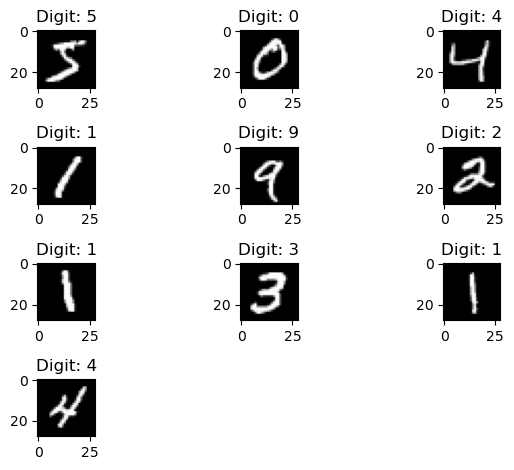

In [6]:
# First 10 training labels 
for i in range(10): 
    plt.subplot(4,3,i+1)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap='gray')
    plt.title("Digit: {}".format(train_labels[i])) 
plt.show()

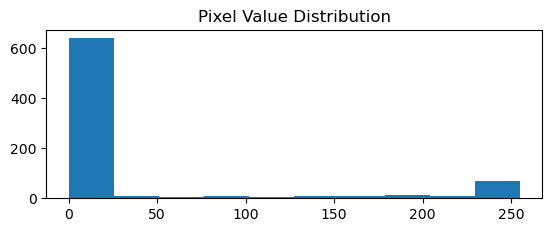

In [7]:
plt.subplot(2,1,2)
plt.hist(train_images[0].reshape(784))
plt.title("Pixel Value Distribution") 
plt.show()

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Training the model and saving metrics in history
history = model.fit(train_images, train_labels,batch_size=64,epochs=15,verbose=2,validation_data=(test_images, test_labels))

Epoch 1/15
938/938 - 58s - loss: 0.1818 - accuracy: 0.9431 - val_loss: 0.1332 - val_accuracy: 0.9529 - 58s/epoch - 62ms/step
Epoch 2/15
938/938 - 55s - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0351 - val_accuracy: 0.9890 - 55s/epoch - 59ms/step
Epoch 3/15
938/938 - 55s - loss: 0.0340 - accuracy: 0.9889 - val_loss: 0.0319 - val_accuracy: 0.9897 - 55s/epoch - 58ms/step
Epoch 4/15
938/938 - 50s - loss: 0.0248 - accuracy: 0.9923 - val_loss: 0.0322 - val_accuracy: 0.9913 - 50s/epoch - 53ms/step
Epoch 5/15
938/938 - 39s - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0284 - val_accuracy: 0.9909 - 39s/epoch - 41ms/step
Epoch 6/15
938/938 - 41s - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0459 - val_accuracy: 0.9881 - 41s/epoch - 44ms/step
Epoch 7/15
938/938 - 37s - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0248 - val_accuracy: 0.9934 - 37s/epoch - 40ms/step
Epoch 8/15
938/938 - 29s - loss: 0.0102 - accuracy: 0.9968 - val_loss: 0.0270 - val_accuracy: 0.9927 - 29s/epoch - 31ms/step


In [9]:
# Evaluate the model on the test data
results = model.evaluate(test_images,test_labels)
print(results)

test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc, test_loss

313/313 [==============================] - 3s 10ms/step - loss: 0.0515 - accuracy: 0.9917
[0.051524363458156586, 0.9916999936103821]
313/313 [==============================] - 4s 11ms/step - loss: 0.0515 - accuracy: 0.9917


(0.9916999936103821, 0.051524363458156586)

In [10]:
predictions = np.argmax(model.predict(test_images), axis=1)

predictions = list(predictions)
actuals = list(test_labels)

pred_res = pd.DataFrame({'Actual': actuals, 'Predictions': predictions}) 
pred_res

313/313 [==============================] - 3s 10ms/step


,Actual,Predictions
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",7
1,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
2,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",4
...,...,...
9995,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
9996,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3
9997,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",4
9998,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",5


In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

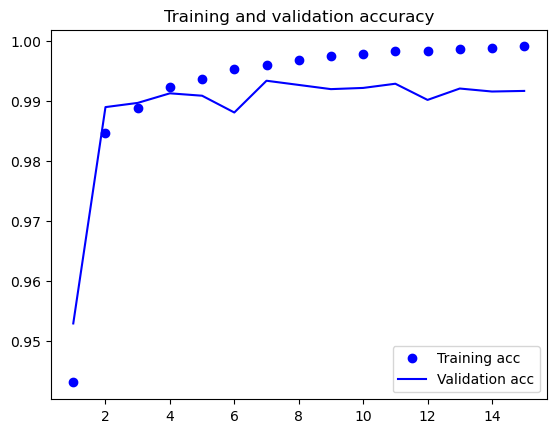

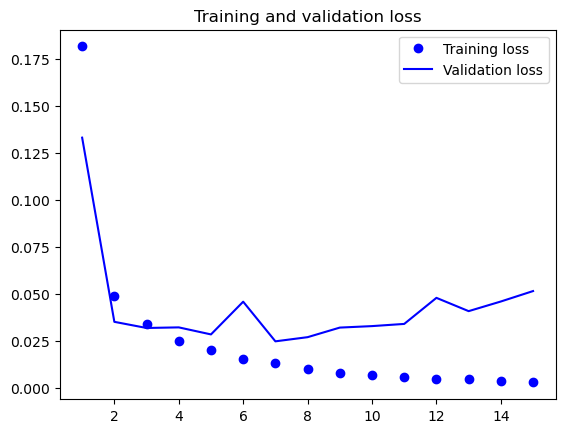

<Figure size 640x480 with 0 Axes>

In [17]:
#  Plotting the results
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.savefig('results/Assignment_6-1_Accuracy.png')
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 
plt.savefig('results/Assignment_6-1_Loss.png')

In [14]:
# Get the current directory and add the results folder to the path.
current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)

In [15]:
model.save('results/Assignment_6-1_model.h5')

In [22]:
#write metrics to file
with open('results/Assignment_6-1_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))
predictions = pd.DataFrame(pred_res)
predictions.to_csv('results/Assignment_6-1_predictions.csv', index=False)